# Zadanie 1

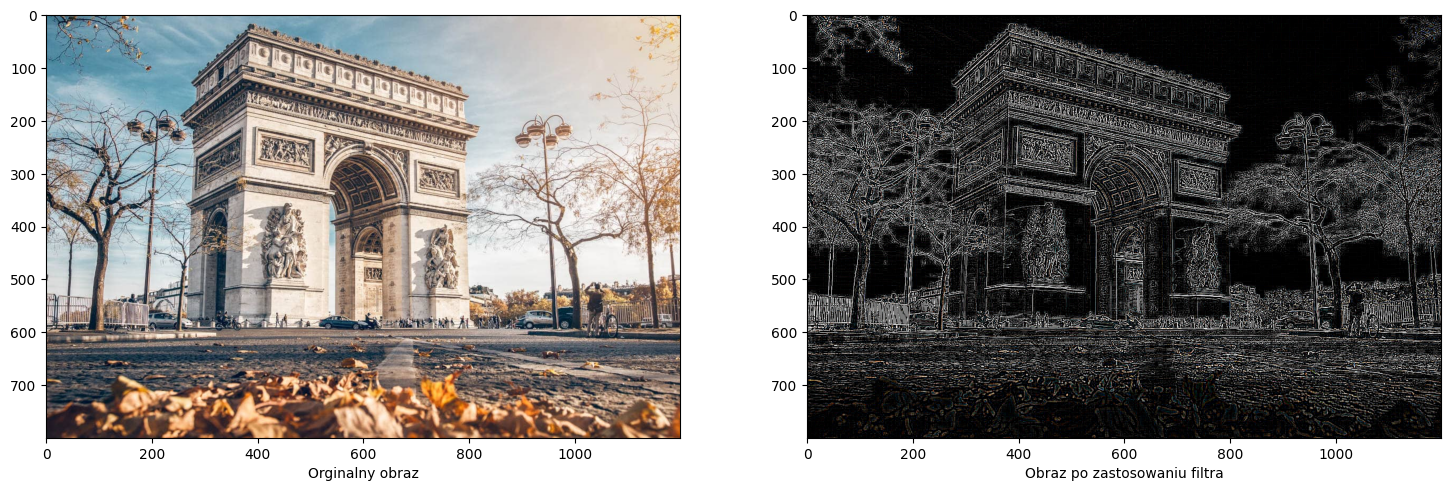

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.rcParams["figure.figsize"] = (18, 10)

fig, ax = plt.subplots(1, 2)

kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

filtered_image = cv.filter2D(image, -1, kernel)

ax[0].set_xlabel('Orginalny obraz')
ax[0].imshow(image)

ax[1].set_xlabel('Obraz po zastosowaniu filtra')
ax[1].imshow(filtered_image)


# Zadanie 2

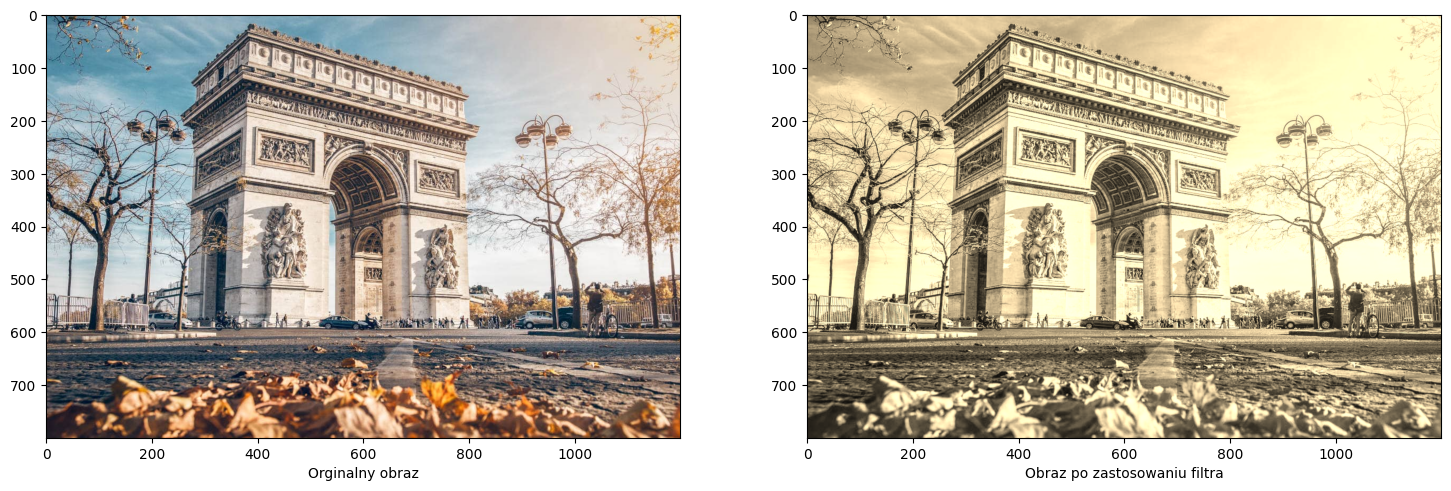

In [18]:
fig, ax = plt.subplots(1, 2)

image_float = image.astype(np.float64) / 255.0

transformation_matrix = np.array([[0.393, 0.769, 0.189],
                                  [0.349, 0.689, 0.168],
                                  [0.272, 0.534, 0.131]])

for x in range(image_float.shape[0]):
    for y in range(image_float.shape[1]):
        color = image_float[x, y]
        new_color = np.dot(transformation_matrix, color)
        new_color = np.clip(new_color, 0, 1)
        image_float[x, y] = new_color

ax[0].set_xlabel('Orginalny obraz')
ax[0].imshow(image)

ax[1].set_xlabel('Obraz po zastosowaniu filtra')
ax[1].imshow(image_float)

# Zadanie 3

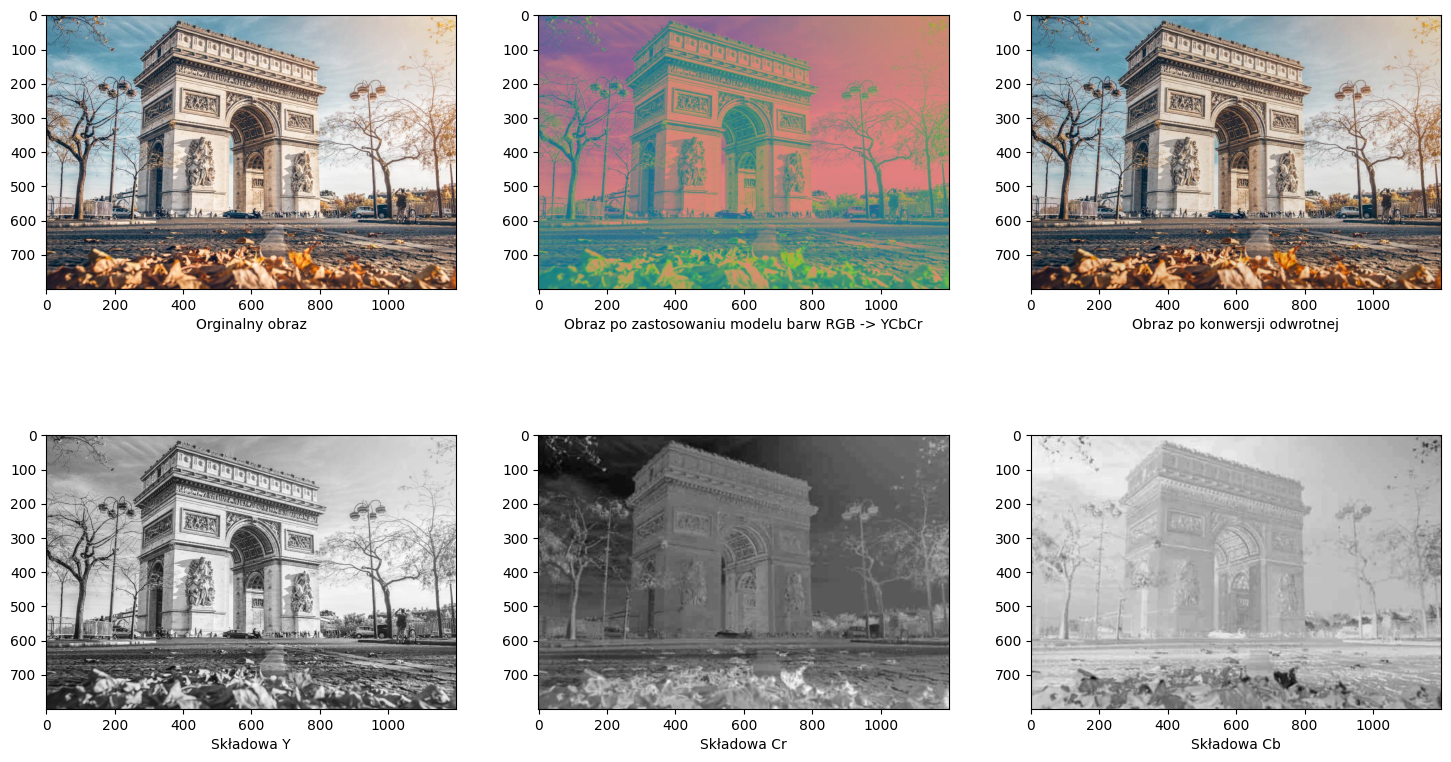

In [19]:

image_yCrCb = image.copy()

fig, ax = plt.subplots(2, 3)

transformation_matrix = np.array([[0.229, 0.587, 0.114],
                                  [0.5, -0.418, -0.082],
                                  [-0.168, -0.331, 0.5]])

matrix = [0, 128, 128]


for x in range(image_yCrCb.shape[0]):
    for y in range(image_yCrCb.shape[1]):
        color = image_yCrCb[x, y]
        new_color = transformation_matrix @ color 
        new_color += matrix
        new_color = np.clip(new_color, 0, 255)
        image_yCrCb[x, y] = new_color

image_converted_back_from_yCrCb = cv.cvtColor(image_yCrCb, cv.COLOR_YCrCb2RGB)

y,cr,cb = cv.split(image_yCrCb)

ax[0][0].set_xlabel('Orginalny obraz')
ax[0][0].imshow(image)

ax[0][1].set_xlabel('Obraz po zastosowaniu modelu barw RGB -> YCbCr')
ax[0][1].imshow(image_yCrCb)

ax[0][2].set_xlabel('Obraz po konwersji odwrotnej')
ax[0][2].imshow(image_converted_back_from_yCrCb)

ax[1][0].set_xlabel('Składowa Y')
ax[1][0].imshow(y, cmap='gray')

ax[1][1].set_xlabel('Składowa Cr')
ax[1][1].imshow(cr, cmap='gray')

ax[1][2].set_xlabel('Składowa Cb')
ax[1][2].imshow(cb, cmap='gray')



# Zadanie 4

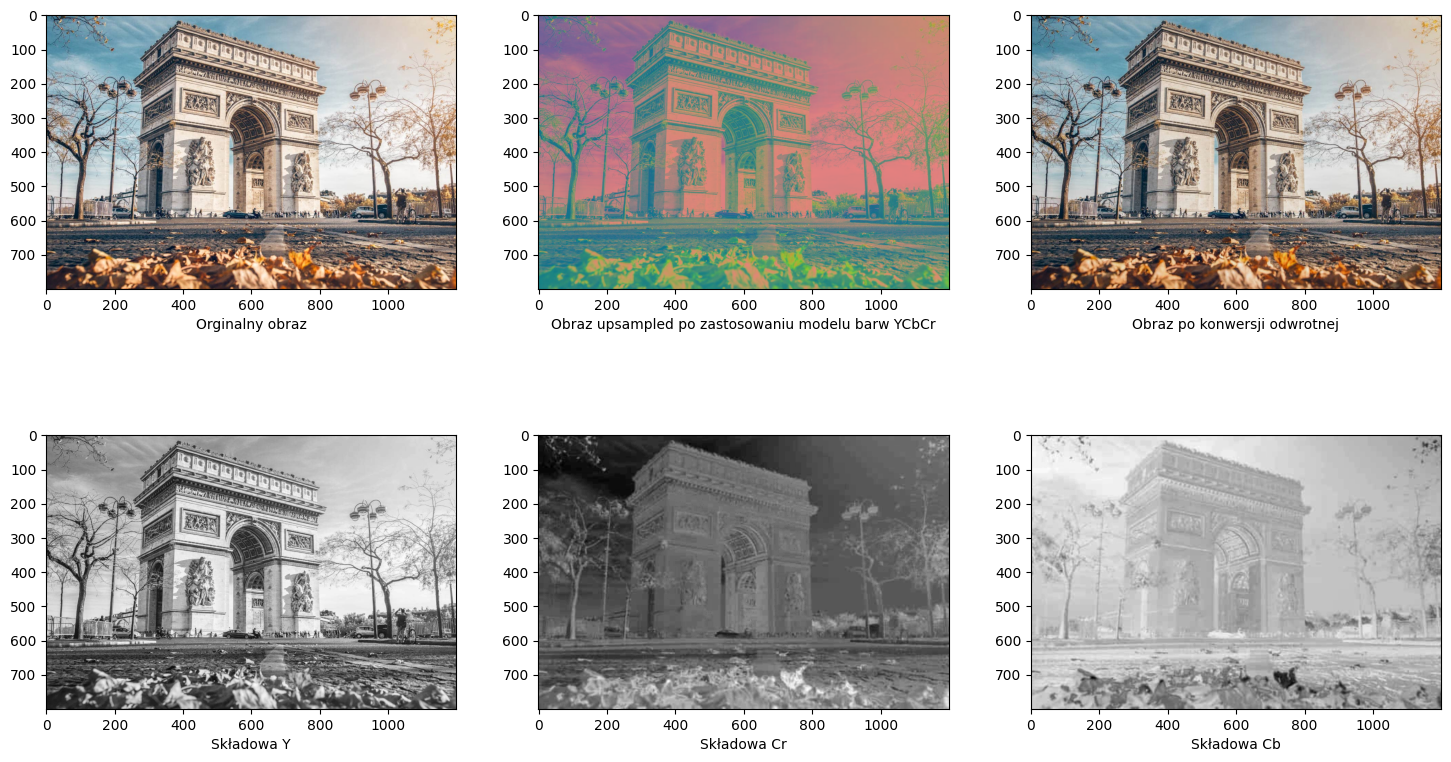

In [20]:
image_dvb = image_yCrCb.copy()

fig, ax = plt.subplots(2, 3)


Y, Cr, Cb = cv.split(image_dvb)


#downsampling
downsampled_Cr = np.zeros((Cr.shape[0] // 2, Cr.shape[1] // 2)).astype(np.uint8)
downsampled_Cb = np.zeros((Cb.shape[0] // 2, Cb.shape[1] // 2)).astype(np.uint8)

for x in range(Cr.shape[0]):
    for y in range(Cr.shape[1]):
        if x % 2 == 0 or y % 2 == 0:
            continue
        downsampled_Cr[x // 2, y // 2] = Cr[x, y] 
        downsampled_Cb[x // 2, y // 2] = Cb[x, y]

#upsampling
upsampled_Cr = np.zeros((Cr.shape[0], Cr.shape[1])).astype(np.uint8)
upsampled_Cb = np.zeros((Cb.shape[0], Cb.shape[1])).astype(np.uint8)

for x in range(Cr.shape[0]):
    for y in range(Cr.shape[1]):
        upsampled_Cr[x, y] = downsampled_Cr[x // 2, y // 2]
        upsampled_Cb[x, y] = downsampled_Cb[x // 2, y // 2]

upsampled_image = cv.merge((Y, upsampled_Cr, upsampled_Cb))

upsampled_image_converted_back_from_yCrCb = cv.cvtColor(upsampled_image, cv.COLOR_YCrCb2RGB)

ax[0,0].set_xlabel('Orginalny obraz')
ax[0,0].imshow(image)

ax[0,1].set_xlabel('Obraz upsampled po zastosowaniu modelu barw YCbCr')
ax[0,1].imshow(upsampled_image)

ax[0,2].set_xlabel('Obraz po konwersji odwrotnej')
ax[0,2].imshow(upsampled_image_converted_back_from_yCrCb)

ax[1,0].set_xlabel('Składowa Y')
ax[1,0].imshow(Y, cmap='gray')

ax[1,1].set_xlabel('Składowa Cr')
ax[1,1].imshow(upsampled_Cr, cmap='gray')

ax[1,2].set_xlabel('Składowa Cb')
ax[1,2].imshow(upsampled_Cb, cmap='gray')





# Zadanie 5

MSE: 0.0025421177004570877
SSIM: 0.9883389597717102


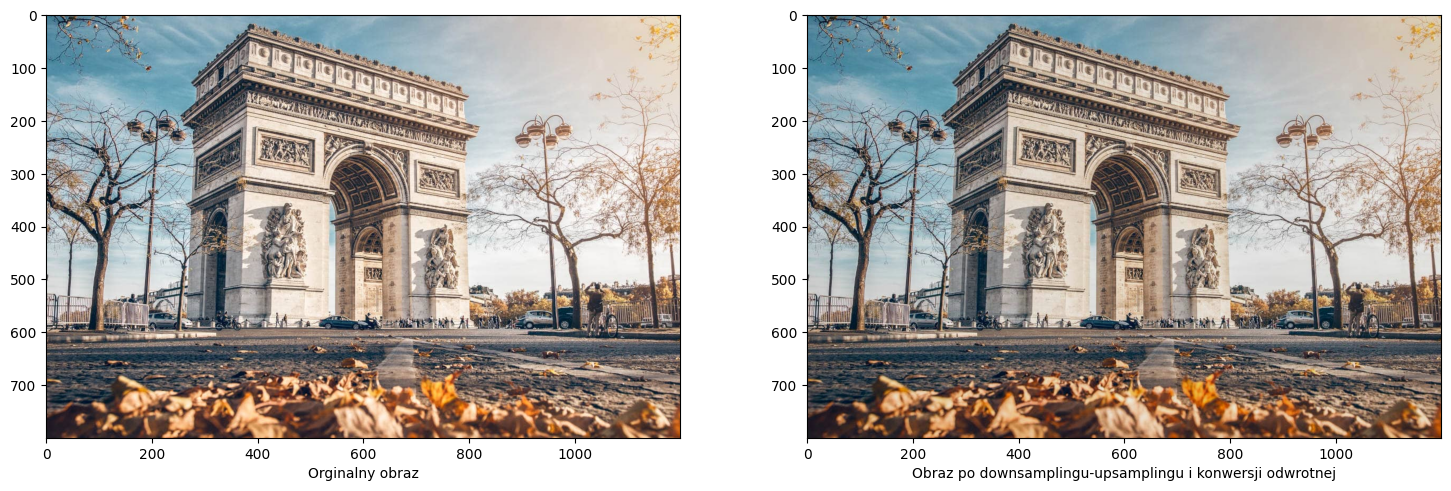

In [23]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

from skimage import data, img_as_float
img = img_as_float(image)
img_s = img_as_float(upsampled_image_converted_back_from_yCrCb)

fig, ax = plt.subplots(1, 2)

mse = np.mean((img - img_s) ** 2, dtype=np.float64)
print(f"MSE: {mse}")

ssim_value, diff = ssim(image, upsampled_image_converted_back_from_yCrCb, channel_axis=-1, full=True)
print(f"SSIM: {ssim_value}")


ax[0].set_xlabel('Orginalny obraz')
ax[0].imshow(image)

ax[1].set_xlabel('Obraz po downsamplingu-upsamplingu i konwersji odwrotnej')
ax[1].imshow(upsampled_image_converted_back_from_yCrCb)

